# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

## Is the distribution of body temperatures normal?

To determine if our distribution of body temperatures are
normal, we can first visualize it by plotting a histogram.

Just by looking at the graph, we can already see patterns
of normal distribution such as more datapoints near the
median and less at the ends.

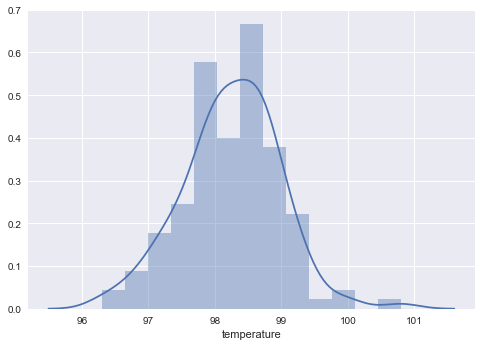

In [2]:
body_temp = df['temperature']
sns.distplot(body_temp)

However, just to be sure, let's use a normal distribution test from SciPy.

Our hypothesis is: The distribution of temperatures are normal.

Our null hypothesis: The distribution of temperatures are not normal.

Since our p-value is greater than 0.05, we can reject the null hypothesis
with confidence.

In [3]:
stats.normaltest(body_temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

## Is the sample size large?

Is 130 people adequate for a sample size? Since we don't have the population ready, we can redirect our approach into confidence levels and margin of error. 

For example, it's desirable to have a 95% confidence rate ± 5% as a margin of error.

For this to work we would need a minimum sample size to be 95 ± 5% confident.

![](https://cdn.smassets.net/wp-content/uploads/2014/10/sample-size-calculator-equation-Google-Docs-300x111.png)
![](https://cdn.smassets.net/wp-content/uploads/2014/10/sample-size-calculation-z-scores.png)

In [4]:
def nec_samp_size(popsize, marginoferror, zscore):
    stdev = 0.50
    x = (zscore**2) * (stdev) * (1-stdev)
    y = marginoferror**2
    z = y*popsize
    a = x / y
    b = x / z
    nec_samp_size = a / (1 + b)
    print("Necessary sample size: ", '%.0f' % nec_samp_size)

In [5]:
nec_samp_size(1000000, 0.05, 1.96)

Necessary sample size:  384


In [6]:
print("Actual sample size:", len(df))

Actual sample size: 130


So assuming that our population is at least 1 million people, we would need at least 384 respondants to be 95 ± 5% confident.

However, we only have 180 respondants. Thus, our sample size is too small for our desired parameters.

Let's change our standards to 90 ± 10% confident.

In [7]:
nec_samp_size(1000000, 0.10, 1.65)

Necessary sample size:  68


Since the necessary sample size for 90 ± 10% confidence is at least 68 respondance for 1 million people, we can say that our sample size is adequate!

## Are the observations independent?

Looking at our regression plot using seaborn, the data points do not follow a trend.
Thus, we can conclude that the observations are independent due to high heart rates being
independent to high temperatures.

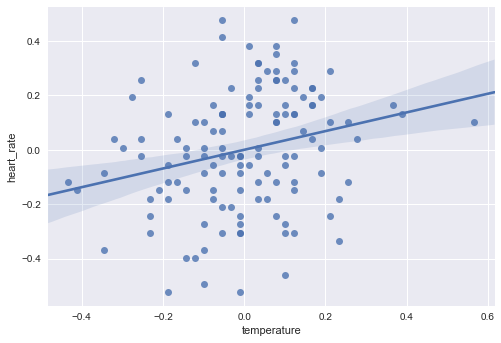

In [8]:
## Normalizing data for comparison

df_th = df[["temperature", "heart_rate"]]
df_norm = (df_th - df_th.mean()) / (df_th.max() - df_th.min())

sns.regplot(df_norm['temperature'], df_norm['heart_rate'])

## Is the true population mean really 98.6 degrees F? 

Since we are assuming the population mean to be 98.6 degrees F, we can use a one sample t-test to see if there is a significant difference between 98.6 degrees F and the mean for this data set.

Null Hypothesis: The population mean is 98.6 degrees F. [no difference in mean]

Alternative Hypothesis: The population mean is less than 98.6 degrees F. [difference in mean]

Since our p-value is less than 0.01, we can reject our null hypothesis with 99% confidence.

In [9]:
stats.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## At what temperature should we consider someone's temperature to be "abnormal"? 

Since we are already getting an idea of the average temperatures for men and women, we can make an inference on when body temperature is getting abnormal. Rather than taking a biological approach, we are going to take a look at confidence intervals and margin of error. Here, we are aiming for 95% confidence.

Thus, we can say that we are 95% confident that: the human body temperature is 98.25 ± 1.44 degrees F or is between 96.81 to 99.68 degrees F.

Anything outside those intervals is considered statistically "abnormal".

In [10]:
df.temperature.mean()

98.24923076923078

In [11]:
CI_low, CI_high = stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std())
CI_low, CI_high

(96.812218185403111, 99.686243353058444)

In [12]:
margin_of_error = float(df.temperature.mean() - CI_low)
margin_of_error

1.4370125838276664

## Is there at difference between male and female body temperature?

Let's try a 2-sample t-test to see if male body temperatures are significantly different compared to female body temperatures.

Null Hypothesis: Males and females have the same body temperature. [no difference in mean]

Alternative Hypothesis: Males and females have difference body temperatures. [difference in mean]

Since our p-value is less than 0.05, we can reject our null hypothesis with 95% confidence.

In [13]:
temp_gender_df = df[['temperature', 'gender']]
male_temp = temp_gender_df[temp_gender_df.gender=='M']
female_temp = temp_gender_df[temp_gender_df.gender=='F']
stats.ttest_ind(male_temp['temperature'],female_temp['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

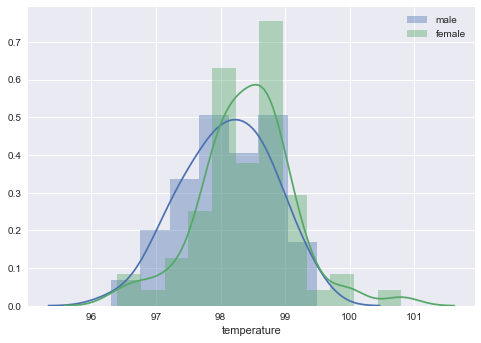

In [14]:
sns.distplot(male_temp['temperature'], label='male')
sns.distplot(female_temp['temperature'], label='female')
plt.legend()

# Conclusions

## What is the True Normal Human Body Temperature?
    The true body normal human body temperature is 98.25 ± 1.44 degrees F with 95% confidence.
   
## Is the distribution of body temperatures normal?
    For this dataset, yes.
    
## Is the sample size large?
    Assuming that the population size is about 1 million people, we can say that it is with 90% confidence.
    
## Are the observations independent?
    Yes, body temperatures are independent to heartrate.
    
## Is the true population mean really 98.6 degrees F?
    No. The true population is less than 98.6 degrees F with 99% confidence.
    
## At what temperature should we consider someone's temperature to be "abnormal"?
    Statistically, anything above or below 96.81 to 99.68 degrees F at 95% confidence.
    
## Is there at difference between male and female body temperature?
    Yes. Females are warmer than males with 95% confidence. 

# Discussion

37 degrees C or 98.6 degrees F is a very fair estimate for a study published in the 1800's. However, with all of the statistics that we have today, we can do better than that. We found the true normal body temperature with confidence. We ensured that our data was normally distributed. We checked that our sample size was large enough to represent at least 1 million people. We concluded that less than the published 98.6 degrees F, with confidence. We also found what we can consider "abnormal" temperatures. Finally, we even concluded that females are warmer than males. This study is showing how we can consistently make improvements to research studies in the past. Even though the past estimate was very close, we were able to make it even better with what we have today.